## 제 1차 과제: 소비 데이터 분석

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
bc_card=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/201906 (1).csv',encoding='utf-8', index_col=0)
bc_card.tail()

,REG_YYMM,MEGA_CTY_NO,MEGA_CTY_NM,CTY_RGN_NO,CTY_RGN_NM,ADMI_CTY_NO,ADMI_CTY_NM,MAIN_BUZ_CODE,MAIN_BUZ_DESC,TP_GRP_NO,...,CSTMR_GUBUN,CSTMR_MEGA_CTY_NO,CSTMR_MEGA_CTY_NM,CSTMR_CTY_RGN_NO,CSTMR_CTY_RGN_NM,SEX_CTGO_CD,AGE_VAL,FLC,AMT,CNT
99996,201906,11,서울특별시,1165,서초구,11650520,서초2동,30,생활,40,...,내국인,43,충청북도,4311,청주시,1,50대,4,50600,10
99997,201906,11,서울특별시,1117,용산구,11170520,용산2가동,30,생활,40,...,내국인,11,서울특별시,1162,관악구,1,40대,2,38640,7
99998,201906,11,서울특별시,1156,영등포구,11560535,영등포동,30,생활,40,...,내국인,28,인천광역시,2817,미추홀구,2,30대,2,340590,15
99999,201906,11,서울특별시,1141,서대문구,11410585,신촌동,40,쇼핑,42,...,내국인,44,충청남도,4413,천안시,1,20대,2,117100,3
100000,201906,11,서울특별시,1135,노원구,11350710,상계9동,20,문화,51,...,내국인,41,경기도,4115,의정부시,1,40대,3,5227500,7


In [3]:
#대분류
bc_card['MAIN_BUZ_DESC'].unique()

array(['음식', '생활', 'T&E', '유흥', '문화', '쇼핑', '내구재', '기타'], dtype=object)

In [4]:
#중분류
bc_card['TP_GRP_NM'].unique()

array(['일반음식', '유통업영리', '음식료품', '여행업', '의료기관', '레져용품', '유통업비영리', '휴게',
       '보건/위생', '학원', '의류', '서적/문구', '레져업소', '가전제품', '문화/취미', '자동차정비/유지',
       '신변잡화', '보험', '수리서비스', '숙박업', '용역서비스', '건강식품', '회원제형태업소',
       '단란주점(음식)', '직물', '가구', '주방용품', '연료판매', '농업', '건축/자재', '유흥주점(음식)',
       '기타', '광학제품', '사무/통신기기', '자동차판매'], dtype=object)

In [5]:
bc_card.info()
#시, 구, 동, 대분류, 중분류, 소분류, 내국인-외국인, 고객거주시, 고객거주동, 성별, 나이(1남자 0여자), ?, 사용한 금액, 사용한 횟수

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100001 entries, 0 to 100000
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   REG_YYMM           100001 non-null  int64 
 1   MEGA_CTY_NO        100001 non-null  int64 
 2   MEGA_CTY_NM        100001 non-null  object
 3   CTY_RGN_NO         100001 non-null  int64 
 4   CTY_RGN_NM         100001 non-null  object
 5   ADMI_CTY_NO        100001 non-null  int64 
 6   ADMI_CTY_NM        100001 non-null  object
 7   MAIN_BUZ_CODE      100001 non-null  int64 
 8   MAIN_BUZ_DESC      100001 non-null  object
 9   TP_GRP_NO          100001 non-null  int64 
 10  TP_GRP_NM          100001 non-null  object
 11  TP_BUZ_NO          100001 non-null  int64 
 12  TP_BUZ_NM          100001 non-null  object
 13  CSTMR_GUBUN        100001 non-null  object
 14  CSTMR_MEGA_CTY_NO  100001 non-null  int64 
 15  CSTMR_MEGA_CTY_NM  100001 non-null  object
 16  CSTMR_CTY_RGN_NO   1

In [6]:
#소분류
bc_card['TP_BUZ_NM'].unique()

array(['서양음식', '편 의 점', '기타음료식품', '일반한식', '택   시', '한의원', '연 쇄 점',
       '스포츠레져용품', '인터넷 P/G', '구내매점(국가기관등)', '제 과 점', '인터넷종합Mall', '종합병원',
       '농축수산품', '주점', '화 장 품', '유아원', '대형할인점', '정장', '일반 서적', '약국',
       '인터넷Mall', '슈퍼 마켓', '일식회집', '당구장', '가전 제품', '중국음식', '의원', '영화관',
       '주 차 장', '기타잡화', '홈쇼핑', '손해 보험', '미곡상', '정기간행물', '스넥', '기타레져업',
       '정 육 점', '세탁소', '미 용 원', '기타숙박업', '특급 호텔', '면 세 점', '생명 보험',
       '이동통신요금', '농,축협직영매장', '완 구 점', '위탁급식업', '아동의류', '초중고교육기관', '사우나',
       '볼 링 장', '치과의원', '노래방', '문구용 품', '세 차 장', '신   발', '기타건강식',
       '기타용역서비스', '자동차부품', '기능학원', 'PG상품권', '공공 요금', '기타 교육', '외국어학원',
       '사무서비스', '화물 운송', '기념품 점', '학원(회원제형태)', '복지 매점', '헬스 크럽', '가정용품수리',
       '종합용역', '악세 사리', '시   계', '학습지교육', '티켓', '출판인쇄물', '위성방송', '자동차정비',
       '고속 버스', '항 공 사', '철   도', '한약방', '동물병원', '단란주점', '안경', '상품권',
       '옷감 직물', '보습학원', '병원', '정보서비스', '일반 가구', '소프트웨어', '의료 용품', '정 수 기',
       '애완 동물', '가례서비스', '피부미용실', '농협하나로클럽', '관광여행', '주 유 소',
       '비료/농약

##3. 데이터 분석

###1.안양시에 거주하는 사람이 쓴 카드내역 건수

In [7]:
# 안양시에 거주하는 사람이 쓴 데이터자료만 ay_bc_card에 분류
index1=bc_card[bc_card['CSTMR_CTY_RGN_NM'] != '안양시'].index
ay_bc_card=bc_card.drop(index1)
print(ay_bc_card)

# 분류한 자료의 인덱스 정리
ay_bc_card.reset_index(drop=True, inplace=True)
print(ay_bc_card)

       REG_YYMM  MEGA_CTY_NO MEGA_CTY_NM  CTY_RGN_NO CTY_RGN_NM  ADMI_CTY_NO  \
13       201906           11       서울특별시        1156       영등포구     11560515   
99       201906           11       서울특별시        1165        서초구     11650530   
102      201906           11       서울특별시        1162        관악구     11620725   
169      201906           11       서울특별시        1114         중구     11140540   
279      201906           11       서울특별시        1117        용산구     11170625   
...         ...          ...         ...         ...        ...          ...   
99591    201906           11       서울특별시        1165        서초구     11650530   
99779    201906           11       서울특별시        1159        동작구     11590620   
99783    201906           11       서울특별시        1135        노원구     11350695   
99895    201906           11       서울특별시        1156       영등포구     11560700   
99993    201906           11       서울특별시        1132        도봉구     11320514   

      ADMI_CTY_NM  MAIN_BUZ_CODE MAIN_B

In [8]:
# 안양시에 거주하는 사람이 쓴 카드내역은 1132건이다.
len(ay_bc_card)

1132

###2.안양시에 거주하는  20대와 40대의 소비액 비교

In [9]:
# 안양시에 거주하는 20대가 사용한 카드내역을 ay_twty에 분류
ay_twty=ay_bc_card[ay_bc_card['AGE_VAL'] == '20대']
print(ay_twty)

# ay_twty의 인덱스 정리
ay_twty.reset_index(inplace=True)
print(ay_twty)

      REG_YYMM  MEGA_CTY_NO MEGA_CTY_NM  CTY_RGN_NO CTY_RGN_NM  ADMI_CTY_NO  \
3       201906           11       서울특별시        1114         중구     11140540   
4       201906           11       서울특별시        1117        용산구     11170625   
6       201906           11       서울특별시        1111        종로구     11110650   
7       201906           11       서울특별시        1111        종로구     11110615   
8       201906           11       서울특별시        1168        강남구     11680580   
...        ...          ...         ...         ...        ...          ...   
1110    201906           11       서울특별시        1168        강남구     11680610   
1115    201906           11       서울특별시        1154        금천구     11545610   
1116    201906           11       서울특별시        1154        금천구     11545610   
1119    201906           11       서울특별시        1121        광진구     11215840   
1123    201906           11       서울특별시        1129        성북구     11290705   

      ADMI_CTY_NM  MAIN_BUZ_CODE MAIN_BUZ_DESC  TP_

In [10]:
# 안양시에 거주하는 40대가 사용한 카드내역을 ay_frty에 분류
ay_frty=ay_bc_card[ay_bc_card['AGE_VAL'] == '40대']
print(ay_frty)

# ay_frty의 인덱스 정리
ay_frty.reset_index(inplace=True)
print(ay_frty)

      REG_YYMM  MEGA_CTY_NO MEGA_CTY_NM  CTY_RGN_NO CTY_RGN_NM  ADMI_CTY_NO  \
9       201906           11       서울특별시        1168        강남구     11680640   
12      201906           11       서울특별시        1156       영등포구     11560540   
14      201906           11       서울특별시        1156       영등포구     11560620   
17      201906           11       서울특별시        1156       영등포구     11560700   
18      201906           11       서울특별시        1144        마포구     11440585   
...        ...          ...         ...         ...        ...          ...   
1118    201906           11       서울특별시        1168        강남구     11680610   
1122    201906           11       서울특별시        1138        은평구     11380580   
1127    201906           11       서울특별시        1165        서초구     11650530   
1128    201906           11       서울특별시        1159        동작구     11590620   
1131    201906           11       서울특별시        1132        도봉구     11320514   

     ADMI_CTY_NM  MAIN_BUZ_CODE MAIN_BUZ_DESC  TP_G

In [13]:
# 안양시에 거주하는 20대와 40대의 소비 분석 내용만 모아 twty_frty에 분류
twty_frty = pd.concat([ay_twty, ay_frty], axis=0)
print(twty_frty)

     index  REG_YYMM  MEGA_CTY_NO MEGA_CTY_NM  CTY_RGN_NO CTY_RGN_NM  \
0        3    201906           11       서울특별시        1114         중구   
1        4    201906           11       서울특별시        1117        용산구   
2        6    201906           11       서울특별시        1111        종로구   
3        7    201906           11       서울특별시        1111        종로구   
4        8    201906           11       서울특별시        1168        강남구   
..     ...       ...          ...         ...         ...        ...   
237   1118    201906           11       서울특별시        1168        강남구   
238   1122    201906           11       서울특별시        1138        은평구   
239   1127    201906           11       서울특별시        1165        서초구   
240   1128    201906           11       서울특별시        1159        동작구   
241   1131    201906           11       서울특별시        1132        도봉구   

     ADMI_CTY_NO  ADMI_CTY_NM  MAIN_BUZ_CODE MAIN_BUZ_DESC  ...  CSTMR_GUBUN  \
0       11140540          회현동             10           

In [27]:
# 20대와 40대의 카드소비분석내용 중 금액만 비교하기
T_F = pd.pivot_table(twty_frty, index = ['AGE_VAL'], aggfunc = 'sum')
T_F = T_F.drop(['ADMI_CTY_NO','CTY_RGN_NO','TP_GRP_NO','MAIN_BUZ_CODE','REG_YYMM','CNT','CSTMR_CTY_RGN_NO','CSTMR_MEGA_CTY_NO','FLC', 'MEGA_CTY_NO','TP_BUZ_NO', 'SEX_CTGO_CD', 'index'], axis=1)

print(T_F)

               AMT
AGE_VAL           
20대      302989526
40대      643661971


<ipython-input-27-d95080e21624>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  T_F = pd.pivot_table(twty_frty, index = ['AGE_VAL'], aggfunc = 'sum')


###3.성북구에서 사용한 카드내역 중 소비한 금액이 큰 순서대로 카테고리 분류

In [33]:
# 성북구에서 사용한 카드내역만 sb_bc_card에 분류
sb_bc_card=bc_card[bc_card['CTY_RGN_NM']=='성북구']
print(sb_bc_card)

# sb_bc_card의 인덱스 정리
sb_bc_card.reset_index(inplace=True)
print(sb_bc_card)

       REG_YYMM  MEGA_CTY_NO MEGA_CTY_NM  CTY_RGN_NO CTY_RGN_NM  ADMI_CTY_NO  \
87       201906           11       서울특별시        1129        성북구     11290725   
138      201906           11       서울특별시        1129        성북구     11290660   
302      201906           11       서울특별시        1129        성북구     11290705   
427      201906           11       서울특별시        1129        성북구     11290600   
448      201906           11       서울특별시        1129        성북구     11290525   
...         ...          ...         ...         ...        ...          ...   
99767    201906           11       서울특별시        1129        성북구     11290705   
99770    201906           11       서울특별시        1129        성북구     11290525   
99856    201906           11       서울특별시        1129        성북구     11290725   
99871    201906           11       서울특별시        1129        성북구     11290575   
99916    201906           11       서울특별시        1129        성북구     11290575   

      ADMI_CTY_NM  MAIN_BUZ_CODE MAIN_B

In [36]:
# 성북구에서 사용한 카드내역을 카테고리에 따라 분류하고 금액만 모아서 출력하기
sb_card_cate = pd.pivot_table(sb_bc_card, index = ['TP_GRP_NM'], aggfunc = 'sum')
sb_card_cate = sb_card_cate.drop(['ADMI_CTY_NO','CTY_RGN_NO','TP_GRP_NO','MAIN_BUZ_CODE','REG_YYMM','CNT','CSTMR_CTY_RGN_NO','CSTMR_MEGA_CTY_NO','FLC', 'MEGA_CTY_NO','TP_BUZ_NO', 'SEX_CTGO_CD', 'index'], axis=1)

print(sb_card_cate)

                 AMT
TP_GRP_NM           
가전제품        22114100
건강식품          482000
건축/자재          48500
광학제품          236000
단란주점(음식)      199000
레져업소        24657600
레져용품         6371450
문화/취미        6940440
보건/위생       50374620
사무/통신기기        34700
서적/문구        5359245
수리서비스       10211760
숙박업          2112200
신변잡화         4907700
연료판매        20368647
용역서비스        1411990
유통업비영리       7351040
유통업영리      629914037
음식료품       132087806
의료기관       220092463
의류          28265260
일반음식       514306430
자동차정비/유지    13322605
자동차판매          20000
주방용품         1321500
직물           1551700
학원         129197617
회원제형태업소     10130400
휴게          66420650


<ipython-input-36-cf8aab204061>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  sb_card_cate = pd.pivot_table(sb_bc_card, index = ['TP_GRP_NM'], aggfunc = 'sum')


In [38]:
sb_card_cate.sort_values('AMT', ascending=False)

,AMT
TP_GRP_NM,
유통업영리,629914037
일반음식,514306430
의료기관,220092463
음식료품,132087806
학원,129197617
휴게,66420650
보건/위생,50374620
의류,28265260
레져업소,24657600


###4.소비한 금액이 많은 순으로 나이와 성별에 따라 분류하기

In [69]:
age_sex_card = pd.pivot_table(bc_card, index = ['AGE_VAL', 'SEX_CTGO_CD'], aggfunc = 'sum')
age_sex_card = age_sex_card.drop(['ADMI_CTY_NO','CTY_RGN_NO','TP_GRP_NO','MAIN_BUZ_CODE','REG_YYMM','CNT','CSTMR_CTY_RGN_NO', 'CSTMR_MEGA_CTY_NO','FLC', 'MEGA_CTY_NO','TP_BUZ_NO'], axis=1)
print(age_sex_card)

                             AMT
AGE_VAL SEX_CTGO_CD             
20대     1            19017618272
        2            21259387746
20세 미만  1              403175877
        2              357385365
30대     1            32768914061
        2            31838995954
40대     1            30294225337
        2            36329146715
50대     1            27560438674
        2            26015671658
60대 이상  1            21663577541
        2            18741741298


<ipython-input-69-bf13d378208c>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  age_sex_card = pd.pivot_table(bc_card, index = ['AGE_VAL', 'SEX_CTGO_CD'], aggfunc = 'sum')


In [70]:
age_sex_card.sort_values('AMT', ascending=False)

AMT
AGE_VAL SEX_CTGO_CD             
40대     2            36329146715
30대     1            32768914061
        2            31838995954
40대     1            30294225337
50대     1            27560438674
        2            26015671658
60대 이상  1            21663577541
20대     2            21259387746
        1            19017618272
60대 이상  2            18741741298
20세 미만  1              403175877
        2              357385365

###5.의료기관 카테고리 중 가장 많은 비용을 지출한 세부 카테고리 상위 5개 정렬

In [73]:
# 의료기관에 사용한 카드내역만 hos_bc_card에 분류
hos_bc_card=bc_card[bc_card['TP_GRP_NM']=='의료기관']
print(hos_bc_card)

# hos_bc_card의 인덱스 정리
hos_bc_card.reset_index(inplace=True)
print(hos_bc_card)

       REG_YYMM  MEGA_CTY_NO MEGA_CTY_NM  CTY_RGN_NO CTY_RGN_NM  ADMI_CTY_NO  \
7        201906           11       서울특별시        1171        송파구     11710646   
26       201906           11       서울특별시        1159        동작구     11590605   
49       201906           11       서울특별시        1168        강남구     11680545   
106      201906           11       서울특별시        1120        성동구     11200535   
119      201906           11       서울특별시        1144        마포구     11440680   
...         ...          ...         ...         ...        ...          ...   
99951    201906           11       서울특별시        1153        구로구     11530530   
99955    201906           11       서울특별시        1168        강남구     11680700   
99957    201906           11       서울특별시        1114         중구     11140680   
99962    201906           11       서울특별시        1135        노원구     11350619   
99976    201906           11       서울특별시        1126        중랑구     11260590   

      ADMI_CTY_NM  MAIN_BUZ_CODE MAIN_B

In [74]:
hos_card_cate = pd.pivot_table(hos_bc_card, index = ['TP_BUZ_NM'], aggfunc = 'sum')
hos_card_cate = hos_card_cate.drop(['ADMI_CTY_NO','CTY_RGN_NO','TP_GRP_NO','MAIN_BUZ_CODE','REG_YYMM','CNT','CSTMR_CTY_RGN_NO','CSTMR_MEGA_CTY_NO','FLC', 'MEGA_CTY_NO','TP_BUZ_NO', 'SEX_CTGO_CD', 'index'], axis=1)
print(hos_card_cate)

                  AMT
TP_BUZ_NM            
건강진단         66313650
기타의료기관및기기    12304750
동물병원        188391978
병원          489206140
산후조리원         5415000
약국         2552984360
의원         4291300143
제약회사         74924800
종합병원       3026040013
치과병원         49687570
치과의원       1184125360
한방병원         58573930
한약방          32046800
한의원         348141910


<ipython-input-74-a14883a45df3>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  hos_card_cate = pd.pivot_table(hos_bc_card, index = ['TP_BUZ_NM'], aggfunc = 'sum')


In [76]:
hos_card_cate.sort_values('AMT', ascending=False).head()

,AMT
TP_BUZ_NM,
의원,4291300143
종합병원,3026040013
약국,2552984360
치과의원,1184125360
병원,489206140


###6.자동차 판매가 가장 많이 이루어진 도시와 가장 적게 이루어진 도시

In [77]:
# 자동차구매에 사용한 카드내역만 car_bc_card에 분류
car_bc_card=bc_card[bc_card['TP_GRP_NM']=='자동차판매']
print(car_bc_card)

# car_bc_card의 인덱스 정리
car_bc_card.reset_index(inplace=True)
print(car_bc_card)

       REG_YYMM  MEGA_CTY_NO MEGA_CTY_NM  CTY_RGN_NO CTY_RGN_NM  ADMI_CTY_NO  \
4127     201906           11       서울특별시        1165        서초구     11650652   
4719     201906           11       서울특별시        1114         중구     11140590   
8526     201906           11       서울특별시        1165        서초구     11650652   
9746     201906           11       서울특별시        1165        서초구     11650530   
11088    201906           11       서울특별시        1117        용산구     11170560   
15165    201906           11       서울특별시        1165        서초구     11650652   
18235    201906           11       서울특별시        1165        서초구     11650652   
24548    201906           11       서울특별시        1165        서초구     11650652   
29111    201906           11       서울특별시        1165        서초구     11650652   
29303    201906           11       서울특별시        1165        서초구     11650600   
31732    201906           11       서울특별시        1165        서초구     11650600   
33359    201906           11       서울특별시

In [80]:
city_buy_car = pd.pivot_table(car_bc_card, index = ['CSTMR_MEGA_CTY_NM'], aggfunc = 'sum')
city_buy_car = city_buy_car.drop(['ADMI_CTY_NO','CTY_RGN_NO','TP_GRP_NO','MAIN_BUZ_CODE','REG_YYMM','CNT','CSTMR_CTY_RGN_NO','CSTMR_MEGA_CTY_NO','FLC', 'MEGA_CTY_NO','TP_BUZ_NO', 'SEX_CTGO_CD', 'index'], axis=1)
print(city_buy_car)

                          AMT
CSTMR_MEGA_CTY_NM            
강원도                    300000
경기도                1646905783
경상북도                206906000
광주광역시               125872000
대전광역시               285757327
서울특별시              1166367637
세종특별자치시              73759300
울산광역시                90681300
인천광역시               177710400
전라북도                294231567
제주특별자치도             265355927
충청남도                219136700


<ipython-input-80-128ee6779d74>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  city_buy_car = pd.pivot_table(car_bc_card, index = ['CSTMR_MEGA_CTY_NM'], aggfunc = 'sum')


In [84]:
city_buy_car.sort_values('AMT', ascending=False).head(1)

,AMT
CSTMR_MEGA_CTY_NM,
경기도,1646905783


In [85]:
city_buy_car.sort_values('AMT').head(1)

,AMT
CSTMR_MEGA_CTY_NM,
강원도,300000


###7.서적에 5천만원 이상 지출하는 지역

In [86]:
# 책구매에 사용한 카드내역만 book_bc_card에 분류
book_bc_card=bc_card[bc_card['TP_BUZ_NM']=='출판인쇄물']
print(book_bc_card)

# book_bc_card의 인덱스 정리
book_bc_card.reset_index(inplace=True)
print(book_bc_card)

       REG_YYMM  MEGA_CTY_NO MEGA_CTY_NM  CTY_RGN_NO CTY_RGN_NM  ADMI_CTY_NO  \
1528     201906           11       서울특별시        1114         중구     11140625   
1647     201906           11       서울특별시        1144        마포구     11440565   
1654     201906           11       서울특별시        1162        관악구     11620525   
2962     201906           11       서울특별시        1162        관악구     11620525   
3100     201906           11       서울특별시        1144        마포구     11440565   
...         ...          ...         ...         ...        ...          ...   
97284    201906           11       서울특별시        1162        관악구     11620525   
97767    201906           11       서울특별시        1141       서대문구     11410585   
98056    201906           11       서울특별시        1162        관악구     11620525   
98298    201906           11       서울특별시        1144        마포구     11440660   
98719    201906           11       서울특별시        1162        관악구     11620525   

      ADMI_CTY_NM  MAIN_BUZ_CODE MAIN_B

In [93]:
city_buy_book = pd.pivot_table(book_bc_card, index = ['CSTMR_MEGA_CTY_NM'], aggfunc = 'sum')
city_buy_book = city_buy_book.drop(['ADMI_CTY_NO','CTY_RGN_NO','TP_GRP_NO','MAIN_BUZ_CODE','REG_YYMM','CNT','CSTMR_CTY_RGN_NO','CSTMR_MEGA_CTY_NO','FLC', 'MEGA_CTY_NO','TP_BUZ_NO', 'SEX_CTGO_CD', 'index'], axis=1)
print(city_buy_book)

                         AMT
CSTMR_MEGA_CTY_NM           
강원도                  4348500
경기도                148173980
경상남도                  370000
경상북도                10783400
광주광역시               13272200
대구광역시               13774550
대전광역시               17921000
부산광역시               14080950
서울특별시               57054440
세종특별자치시              2403000
울산광역시               12308800
인천광역시               30648970
전라남도                 8094600
전라북도                 1952490
제주특별자치도              9612700
충청남도                 8494750
충청북도                 3995500


<ipython-input-93-8b2849fa8f55>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  city_buy_book = pd.pivot_table(book_bc_card, index = ['CSTMR_MEGA_CTY_NM'], aggfunc = 'sum')


In [105]:
city_buy_book[city_buy_book['AMT']>=50000000]

,AMT
CSTMR_MEGA_CTY_NM,
경기도,148173980
서울특별시,57054440


###8.나이에 따른 카드내역 건수에 대한 막대그래프

<function matplotlib.pyplot.show(close=None, block=None)>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  func(*args,

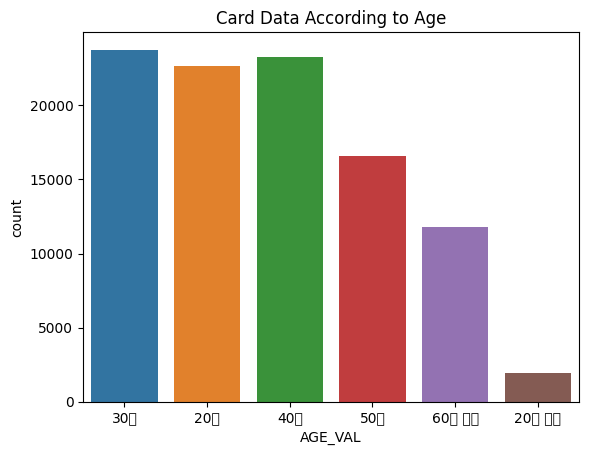

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='AGE_VAL', data=bc_card)
plt.title('Card Data Amount According to Age')
plt.show

###9.나이에 따른 소비 금액대에 대한 산점도표

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

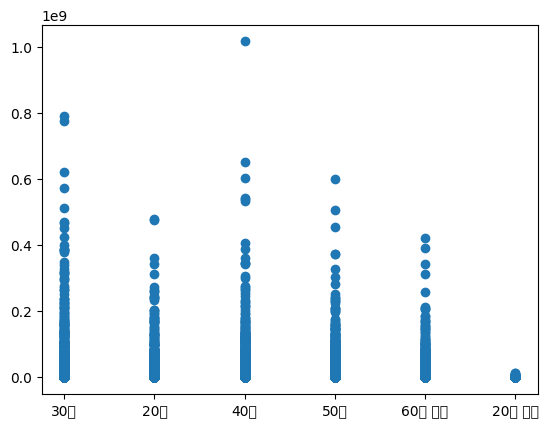

In [111]:
plt.scatter(bc_card['AGE_VAL'], bc_card['AMT'])
plt.show()

###10.나이대, 성별에 따른 소비금액 관계 시각화

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118

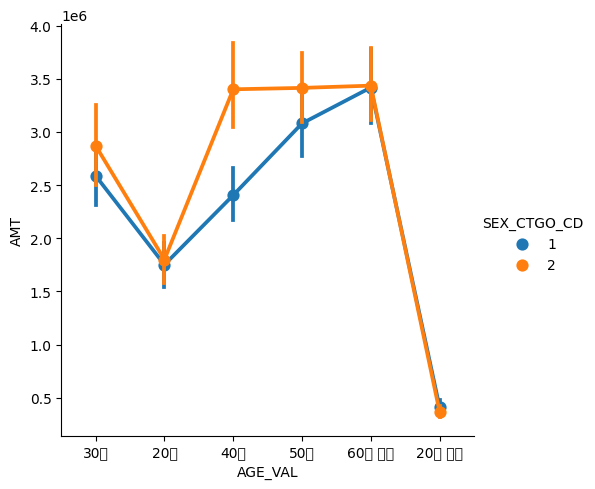

In [112]:
sns.catplot(x = 'AGE_VAL', y = 'AMT', hue = 'SEX_CTGO_CD', data = bc_card, kind = 'point')
plt.show()